In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fanalysis.mca import MCA
%matplotlib inline
df = pd.read_csv('mini_projet.csv')
doc = pd.read_csv('doc_var.csv')
doc.set_index('var', inplace=True)
df = df.drop('Unnamed: 0', axis=1)
df.fillna(99999999, inplace=True)
df['HV225'] = df['HV225'].astype(int)
df['HV230B'] = df['HV230B'].astype(int)
df.replace(99999999, 'NaN', inplace=True)
df['HV230B'] = df['HV230B'].astype(str)

In [90]:
### GRAPHICS
#df['HV201'].value_counts(normalize=True).plot.bar(rot=45, legend=False, title='lol')
#df.groupby('HV025')['HV205'].value_counts(normalize=True).plot.bar(rot=45, legend=False, title='')
#df.groupby('HV025')['HV206'].value_counts(normalize=True).plot.bar(rot=45, legend=False, title='')
#df.groupby('HV025')['HV213'].value_counts(normalize=True).plot.bar(rot=45, legend=False, title='')
#df.groupby('HV025')['HV214'].value_counts(normalize=True).plot.bar(rot=45, legend=False, title='')
#df.groupby('HV025')['HV226'].value_counts(normalize=True).plot.bar(rot=45, legend=False, title='')
#df.groupby('HV025')['HV230B'].value_counts(normalize=True).plot.bar(rot=45, legend=False, title='')
#df.groupby('HV025')['HV252'].value_counts(normalize=True).plot.bar(rot=90, legend=False, title='')
#df.groupby('HV025')['HV270A'].value_counts(normalize=True).plot.bar(rot=90, legend=False, title='')

In [44]:
### ON PEUT COMMENCER L'ANALYSE EXPLORATOIRE ###

In [205]:
### VARIABLES CATÉGORIELLES
a_grp = df.groupby(['HV025'])
w_grp = df.groupby(['HV270A'])
r_grp = df.groupby(['HV024'])

area = df['HV025'].value_counts()
area_p = df['HV025'].value_counts(normalize=True)
source_drink = df['HV201'].value_counts(normalize=True)
toilet_type = df['HV205'].value_counts(normalize=True)
electricity = a_grp['HV206'].sum()
electricity = electricity/area
floor = df['HV213'].value_counts(normalize=True)
wall = df['HV214'].value_counts(normalize=True)
cooking_type = df['HV226'].value_counts(normalize=True)
no_water_hands = a_grp['HV230B'].apply(lambda x: x.str.contains('0').sum())
no_water_hands = no_water_hands/area
smoking_freq = df['HV252'].value_counts(normalize=True)
wealth = df['HV270A'].value_counts(normalize=True)

var_c = [area, area_p, source_drink, toilet_type, electricity,
                floor, wall, cooking_type, no_water_hands,
                 smoking_freq, wealth]

###########################
floor
###########################
### .plot.bar(rot=45, legend=False, title='')

Earth/Sand        0.475802
Cement screed     0.270472
Dung and other    0.253727
Name: HV213, dtype: float64

,median,mean,var
HV270A,,,
Middle,4,4.557132,7.735448
Poorer,4,4.677452,7.267365
Poorest,5,4.687472,6.550827
Richer,4,4.629877,7.886228
Richest,4,4.718599,8.171503


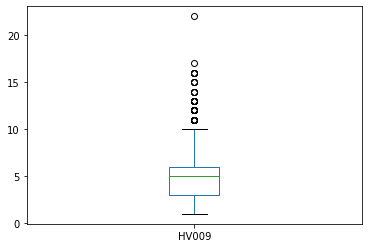

In [208]:
### VARIABLES QUANTITATIVES
a_grp = df.groupby(['HV025'])
w_grp = df.groupby(['HV270A'])
r_grp = df.groupby(['HV024'])

rural_flt = df['HV025'] == 'Rural'
urban_flt = df['HV025'] == 'Urban'
rich_flt = df['HV270A'] == 'Richest'
poor_flt = df['HV270A'] == 'Poorest'

num_age_head = df.loc[urban_flt]['HV220']
num_members =  df.loc[poor_flt]['HV009']

age_head = a_grp['HV220'].agg(['median','mean','var'])#.loc['Urban']
members =  w_grp['HV009'].agg(['median','mean','var'])#.loc['Urban']

var_q = [age_head, members]
###########################
num_members.plot.box(vert=True, subplots=True, title='')
members
###########################
### .plot.box(vert=True, subplots=True, title='')

In [204]:
df['HV270A'].unique()

array(['Richer', 'Middle', 'Richest', 'Poorer', 'Poorest'], dtype=object)

In [ ]:
dfc['HV205'].value_counts(normalize=True).plot.bar(rot=45, legend=False,)

In [ ]:
dfc.plot.box(vert=True, subplots=True)

In [ ]:
dfc.groupby('HV025')['HV206'].value_counts(normalize=True).plot.bar(rot=45, legend=False,)

In [46]:
# USEFULL
area_grp = df.groupby(['HV025'])
# Le nombre d'urbain satisfaisant chaque modalité de HV226
area_grp['HV226'].value_counts(normalize=True).loc['Urban']
# Stats de HV220 pour les urbains
area_grp['HV220'].agg(['median','mean']).loc['Urban']
# Le nombre de ruraux qui satisfont la modalié 'Charcoal' de la variable 'HV220'
area_grp['HV226'].apply(lambda x: x.str.contains('Charcoal').sum()).loc['Rural']

2053

In [91]:
# USEFULL
area_grp = df.groupby(['HV025'])
people_using_charcoal = area_grp['HV226'].apply(lambda x: x.str.contains('Charcoal').sum())
effectifs = df['HV025'].value_counts()
charcoal_df = pd.concat([people_using_charcoal, effectifs], axis='columns', sort=False)
charcoal_df['proportion'] = charcoal_df['HV226']/charcoal_df['HV025']
charcoal_df.rename(columns={'HV226':'charcoal_users', 'HV025':'effectif'}, inplace=True)
charcoal_df.sort_values(by='proportion', ascending=False, inplace =False)
charcoal_df#.loc['Rural']

,charcoal_users,effectif,proportion
HV025,,,
Rural,2053,15119,0.135789
Urban,2657,4469,0.594540


In [195]:
rural_flt = df['HV025'] == 'Rural'
urban_flt = df['HV025'] == 'Urban'

In [196]:
df.loc[rural_flt]['HV226'].str.contains('Charcoal').sum()

2053

In [ ]:
df.loc[rural_flt]['HV226'].value_counts(normalize=True)